In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("calories-data.csv")
data.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
312,54,Male,78.4,1.90,174,146,72,0.81,585.0,Yoga,21.5,3.7,2,1,21.72
653,18,Female,50.7,1.53,181,147,52,1.29,948.0,Yoga,33.0,2.1,3,2,21.66
754,21,Female,54.9,1.78,173,138,71,0.55,380.0,HIIT,31.7,2.0,2,1,17.33
761,49,Female,70.2,1.67,186,166,50,0.93,695.0,Strength,32.5,1.8,3,1,25.17
736,27,Male,80.7,1.61,170,166,52,1.75,1598.0,Strength,14.3,3.5,4,3,31.13
277,50,Male,51.5,1.71,199,155,64,1.48,1136.0,Yoga,20.9,2.9,2,1,17.61
670,45,Female,50.9,1.65,170,136,50,1.45,887.0,Strength,30.1,2.3,2,1,18.70
63,53,Male,51.8,1.74,179,127,61,1.23,773.0,Strength,21.3,3.7,3,2,17.11
198,28,Male,66.0,1.90,175,158,56,1.18,1025.0,HIIT,24.1,3.0,3,1,18.28
755,42,Male,50.3,1.64,177,150,62,0.63,468.0,Strength,27.0,2.4,3,1,18.70


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
data.isnull().count()

Age                              973
Gender                           973
Weight (kg)                      973
Height (m)                       973
Max_BPM                          973
Avg_BPM                          973
Resting_BPM                      973
Session_Duration (hours)         973
Calories_Burned                  973
Workout_Type                     973
Fat_Percentage                   973
Water_Intake (liters)            973
Workout_Frequency (days/week)    973
Experience_Level                 973
BMI                              973
dtype: int64

In [5]:
data['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

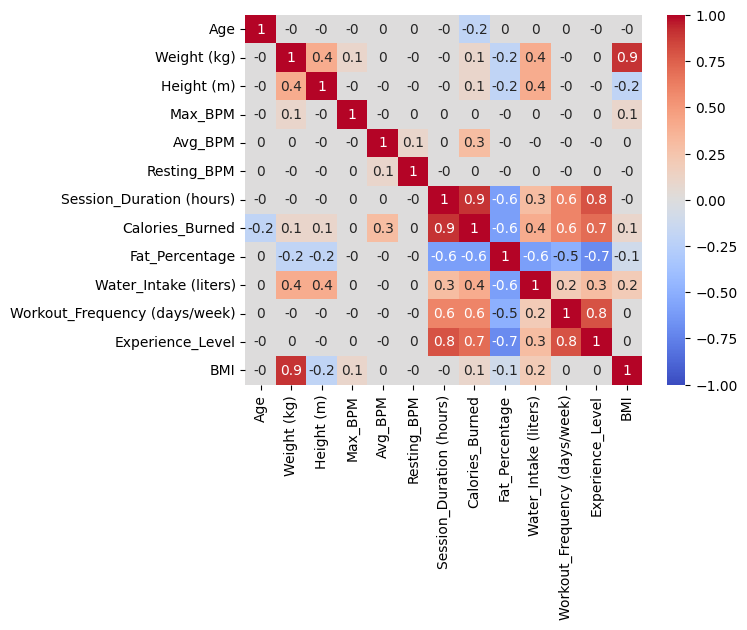

In [6]:
import seaborn as sns
sns.heatmap(data.drop(axis=1,columns=["Gender","Workout_Type"]).corr().round(1), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

- height , weight could be used directly in BMI
- BPM shows almost no significant relation with other features
- experience level highly affects session duration to can be eliminated
- water intake doesn't have to do much with calories burnt in real world , so could be ignored
- fat percentage column seems to show wrong relation with bmi, as fat % is expected to show strong positive relation with bmi but is showing a slight negative relation. so it have to be droped

#### Eliminating less relevent Data

In [7]:
data_new = data.drop(axis=1,columns=["Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Fat_Percentage","Water_Intake (liters)","Experience_Level"])
data_new.sample(6)

,Age,Gender,Session_Duration (hours),Calories_Burned,Workout_Type,Workout_Frequency (days/week),BMI
272,33,Female,0.92,662.0,Yoga,3,20.40
530,38,Male,1.74,1321.0,Yoga,5,27.59
765,35,Male,0.84,559.0,HIIT,2,32.74
384,30,Male,1.37,1145.0,HIIT,3,23.08
174,49,Male,1.46,925.0,Yoga,3,26.77
55,23,Male,1.47,1318.0,Cardio,4,44.84


#### Detecting Outliers

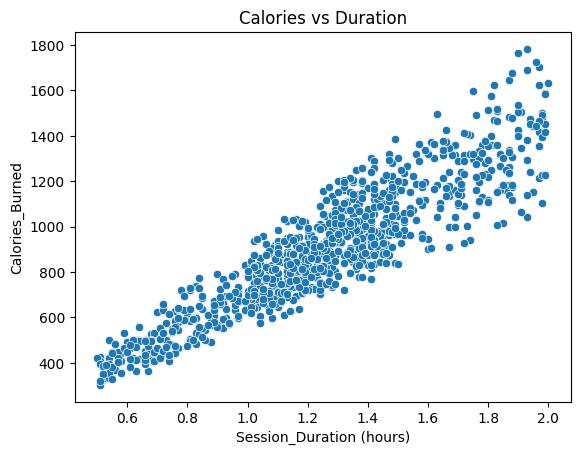

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data_new['Session_Duration (hours)'], y=data_new['Calories_Burned'])
plt.title("Calories vs Duration")
plt.show()



In [9]:
data_new['BMI'].describe()


count    973.000000
mean      24.912127
std        6.660879
min       12.320000
25%       20.110000
50%       24.160000
75%       28.560000
max       49.840000
Name: BMI, dtype: float64

-BMI Range between 12 to 50 is usually normal for humans

In [10]:
x = data_new.drop(axis=1,columns=["Calories_Burned"])
y = data_new["Calories_Burned"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
x_train.sample(5)

,Age,Gender,Session_Duration (hours),Workout_Type,Workout_Frequency (days/week),BMI
905,54,Male,1.42,Yoga,3,28.56
86,25,Male,1.34,Cardio,3,29.71
783,47,Male,1.29,Cardio,3,12.32
554,26,Male,1.02,Yoga,2,30.89
661,44,Male,1.34,Yoga,4,38.50


### Preprocessing with Transformers

In [13]:
trf1 = ColumnTransformer([
    ('cat_encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[1,3])
],remainder='passthrough')

In [14]:
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(4,8))
],remainder='passthrough')

#### Creating Data preprocessing pipeline

In [15]:
data_pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

#### Preprocessing the data

In [16]:
x_train_final = data_pipe.fit_transform(x_train)
x_test_final = data_pipe.fit_transform(x_test)
x_train_final.shape

(778, 8)

In [17]:
y_train.shape

(778,)

### Testing different Algorithm on the data

##### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_final,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = lr.predict(x_test_final)

In [20]:
r2_score(y_test,y_pred)

0.8660263150912134

#### Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train_final)
x_test_poly = poly.fit_transform(x_test_final)

In [22]:
polyreg = LinearRegression()
polyreg.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
r2_score(y_test,polyreg.predict(x_test_poly))

0.8602951549325522

#### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

In [25]:
r = Ridge(alpha=11)
r.fit(x_train_final,y_train)

,alpha,11
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [26]:
r2_score(y_test,r.predict(x_test_final))

0.8664426164878947

#### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

In [28]:
l = Lasso(alpha=5)
l.fit(x_train_final,y_train)

,alpha,5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [29]:
r2_score(y_test,l.predict(x_test_final))

0.8670249289701788

#### Elasticnet Regression

In [30]:
from sklearn.linear_model import ElasticNet

In [31]:
e = ElasticNet(alpha=0.02,l1_ratio=0.3)
e.fit(x_train_final,y_train)

,alpha,0.02
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [32]:
r2_score(y_test,e.predict(x_test_final))

0.8664455529884456

Got the best results with lasso regression

Also trained the Model with features like fat percentege, water intake, workout frequency but didn't got a better result

### Creating a Final Pipeline for deployment

In [33]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('train',Lasso(alpha=5))
])

In [34]:
pipe.fit(x_train,y_train)

,steps,"[('trf1', ...), ('trf2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_encode', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
r2_score(y_test,pipe.predict(x_test))

0.8664685615734238

### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=5).mean()

np.float64(0.8676295642402637)

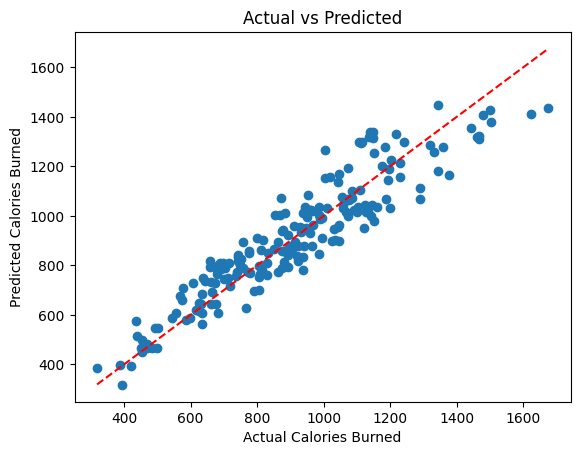

In [37]:
import matplotlib.pyplot as plt

y_pred = pipe.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Exporting the Model/Pipeline

In [38]:
import pickle as pkl
pkl.dump(pipe,open('model.pkl','wb'))